In [1]:
!ls /keyakizaka_mining/model/facenet

20180402-114759  20180408-102900


In [2]:
!ls /keyakizaka_mining/data/faceimages

hamakishihiyori   katoushiho	      odanana		 takamotoayahana
haradaaoi	  kawatayouna	      ozekirika		 takaseaina
higashimuramei	  kobayashiyui	      saitoufuyuyuuhana  tannamameisato
hirateyurina	  koikeminami	      saitoukyouko	 tomitasuzuhana
inokuchimakotoo   kosakanao	      sasakibirei	 tsuchinamamizuho
ishimorinijihana  matsudakouhana      sasakikumi	 watanabemiho
kageyamayuuka	  miyataaihou	      satoushishoku	 watanabenashika
kakizakimemi	  moriyaakane	      shiosarina	 watanaberisa
kamimurarina	  nagahamaneru	      sugaiyuka
kanamurabiku	  nagasawana???kaori  suzuhonbiyu


In [4]:
# path

# save_dir = '/keyakizaka_mining/data/faceimages'
save_dir = '/keyakizaka_mining/data/faceimages_pad0'
#save_feature_dir = '/keyakizaka_mining/data/feature/faceimage'
save_feature_dir = '/keyakizaka_mining/data/feature/faceimage_pad0'
tool_dir = '/keyakizaka_mining/tools'
FACE_MEDEL_PATH = '/keyakizaka_mining/model/facenet/20180408-102900/20180408-102900.pb'

In [5]:
import os, sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from annoy import AnnoyIndex
import random

import cloudpickle

def load_from_pkl( fpath ):
    frb = open(fpath, 'rb')
    obj = cloudpickle.loads(frb.read())
    return obj

def save_as_pkl( obj, fpath ):
    fwb = open( fpath, 'wb')
    tmp = fwb.write(cloudpickle.dumps(obj))
    return

In [6]:
# load feature

# fname = ('vgg_fc2',4096)
fname = ('facenet',512)

target_name = 'watanaberisa'

X_test = np.empty((0,fname[1]), float)
image_list_test = []
dirs = os.listdir( save_dir )
for author in dirs:
    if not author == target_name: continue
    print( author )
    X_tmp = load_from_pkl( '%s/%s/X_%s_%s.pkl' % (save_feature_dir, fname[0], fname[0], author) )
    X_test = np.append(X_test, X_tmp, axis=0)
    image_list_tmp = load_from_pkl( '%s/%s/imagelist_%s_%s.pkl' % (save_feature_dir, fname[0], fname[0], author) )
    image_list_test.extend( image_list_tmp )

watanaberisa


In [7]:
# add path for facenet model
sys.path.append(tool_dir + '/DAGMM')
from dagmm import DAGMM

model = DAGMM(
  comp_hiddens=[32,16,2], comp_activation=tf.nn.tanh,
  est_hiddens=[16, 8], est_activation=tf.nn.tanh,
  est_dropout_ratio=0.25
)

SyntaxError: invalid syntax (compression_net.py, line 38)

In [45]:
model.fit(X_test)
energy = model.predict(X_test)

 epoch 100/100 : loss = 509.452


Text(0, 0.5, 'Number of Sample(s)')

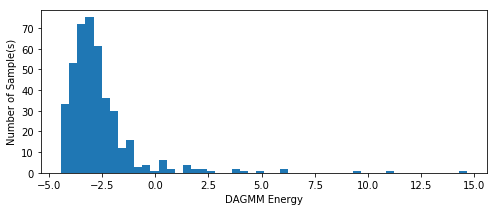

In [46]:
plt.figure(figsize=[8,3])
histinfo = plt.hist(energy, bins=50)
plt.xlabel("DAGMM Energy")
plt.ylabel("Number of Sample(s)")

Text(0, 0.5, 'Energy')

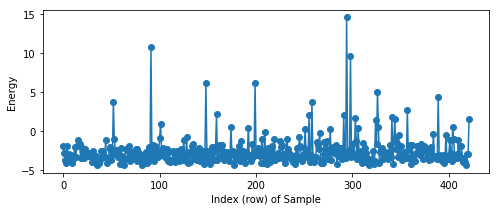

In [47]:
plt.figure(figsize=[8,3])
plt.plot(energy, "o-")
plt.xlabel("Index (row) of Sample")
plt.ylabel("Energy")

In [53]:
th = np.percentile(energy, 99); print(th)
outliers = [ i for i in range( len(energy) ) if energy[i] > th ]

5.881729230880762


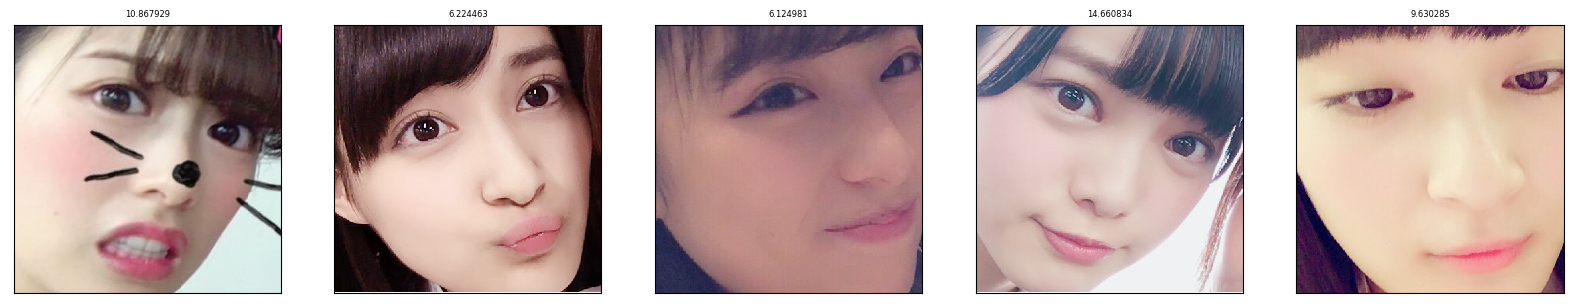

In [54]:
def plot_kimages(k, image_index):
    fig, ax = plt.subplots(ncols=k, figsize=(20,20), dpi=100)
    for i in range( k ): # search_k=-1
        im = Image.open( image_list_test[image_index[i]] )
        im_list = np.asarray(im)
        ax[i].set_title('%f'%(energy[image_index[i]]), fontsize=6 )
        ax[i].tick_params(labelbottom=False,bottom=False)
        ax[i].tick_params(labelleft=False,left=False)
        ax[i].imshow(im_list)
    plt.show()

k = 10
for i in range( 0, len( outliers ), k ):
    target = outliers[i:i+k]
    if len( target ) < k: k = len( target )
    plot_kimages(k, target)